In [263]:
#import pandas packages used in the notebook 
import urllib.request 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import pandas.io.sql as sqlio
import statsmodels.api as sm 

# line magic to render and save images to notebook
%matplotlib inline 

## Raw Data

**Data Source**

In [264]:
#Heating degree day (HDD) is a measurement of demand for energy needed to heat a building.
# download the csv file and save it locally 
url = 'https://data.smartdublin.ie/dataset/10130831-d2a5-4f4f-b56b-03d8e2cc56c8/resource/9f8a9b41-60a9-4cbd-8630-865e51a18724/download/dcccivicofficeheatingdegreedaysp20130221-1853.csv'
try : 
    urllib.request.urlretrieve(url, 'heating.csv')
except Exception as err: 
    print("Error occured", err)

In [266]:
# read downloadded file into pandas daraframe
df = pd.read_csv('heating.csv', skiprows = 1)

**Exploring the dataset**

In [267]:
#inspect the dataframe
df.head()

,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,07/11/2009,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.096250,0.095937,0.098854,0.101354,0.103646,0.105104,0.106146,0.106979,0.107604,0.107917
1,08/11/2009,96,0.106875,0.107708,0.107708,0.106771,0.105729,0.105104,0.106042,0.103854,...,0.106771,0.106458,0.106771,0.106667,0.108854,0.110417,0.111562,0.110417,0.112708,0.115938
2,09/11/2009,96,0.118958,0.117708,0.116563,0.117292,0.116979,0.118229,0.117500,0.116979,...,0.065313,0.065208,0.065208,0.065313,0.065313,0.065833,0.065729,0.065313,0.064792,0.064271
3,10/11/2009,96,0.063750,0.063542,0.062708,0.062812,0.063021,0.063021,0.061979,0.060833,...,0.104688,0.105729,0.106979,0.108542,0.110000,0.111979,0.112917,0.112292,0.114062,0.116563
4,11/11/2009,96,0.118021,0.118333,0.120208,0.119479,0.117708,0.117396,0.116667,0.114479,...,0.052708,0.052292,0.052396,0.053229,0.056458,0.059479,0.065313,0.067396,0.068437,0.068542


In [268]:
# get dimensions of raw dataset 
df.shape

(1202, 98)

In [269]:
# Generate descriptive statistics
df.describe() # describe all numeric columns

,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
count,1202.0,1201.000000,1201.000000,1200.000000,1198.000000,1198.000000,1198.000000,1198.000000,1200.000000,1200.000000,...,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,96.0,0.068573,0.069090,0.069483,0.069916,0.070368,0.070830,0.071209,0.071484,0.071762,...,0.063419,0.063933,0.064498,0.065072,0.065661,0.066181,0.066683,0.067251,0.067722,0.068147
std,0.0,0.045886,0.045867,0.045771,0.045775,0.045835,0.045816,0.045781,0.045769,0.045754,...,0.045910,0.045853,0.045868,0.045858,0.045850,0.045776,0.045684,0.045719,0.045772,0.045796
min,96.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.0,0.031657,0.032558,0.033573,0.033706,0.033651,0.033990,0.034466,0.035140,0.035369,...,0.024780,0.025737,0.026056,0.026727,0.027279,0.028486,0.029450,0.030302,0.030752,0.031641
50%,96.0,0.065182,0.066047,0.065614,0.066667,0.067058,0.067402,0.067839,0.067654,0.068189,...,0.059247,0.059888,0.060578,0.060962,0.062035,0.062512,0.063326,0.063701,0.064341,0.064310
75%,96.0,0.101995,0.102673,0.102813,0.103216,0.103351,0.104260,0.104523,0.104411,0.103886,...,0.096667,0.097672,0.098145,0.098493,0.098953,0.099504,0.100214,0.100729,0.101805,0.101830
max,96.0,0.221771,0.219375,0.216979,0.217500,0.216252,0.216579,0.216857,0.215253,0.213049,...,0.211533,0.211146,0.214167,0.216250,0.218437,0.220208,0.220625,0.222812,0.222917,0.222917


In [270]:
# Print a concise summary of a DataFrame
# df.info()  # prints out 98 lines so commenting out
df.dtypes 
# first 2 columns are date and integer. rest of the columns contain floating values

Date       object
Values      int64
00:00     float64
00:15     float64
00:30     float64
           ...   
22:45     float64
23:00     float64
23:15     float64
23:30     float64
23:45     float64
Length: 98, dtype: object

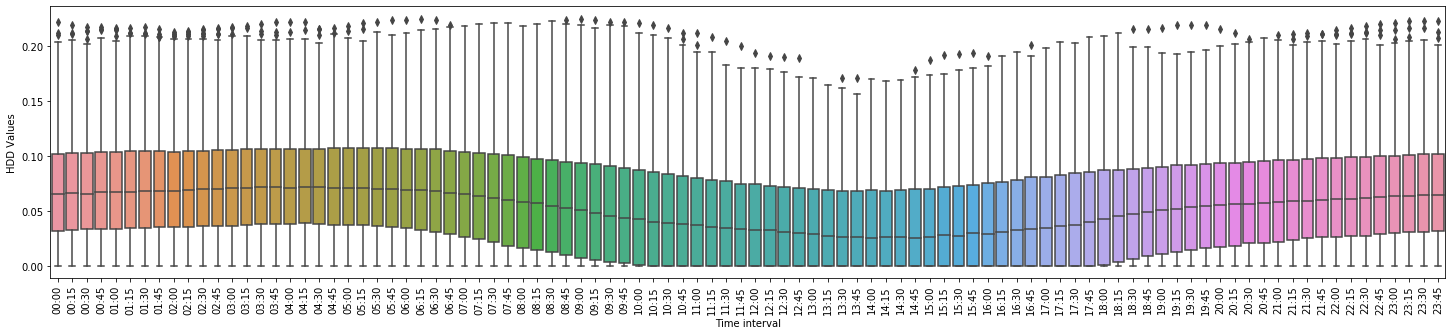

In [271]:
# box plot of 15-min interval readings
plt.figure(figsize=(25, 5))
fig = sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,2:]))
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set(xlabel='Time interval', ylabel='HDD Values')
plt.show()

## Data wrangling

In [272]:
# find out many values are missing 
df.isna().sum().sum()
# total of 119 missing values out of 1202 x 98 observations ~ 118K , only a very small percentage has missing values

119

In [273]:
# check if date column has missing values
df['Date'].isnull().sum()
# no dates are missing

0

In [274]:
# check if value column has any missing values
df['Values'].isnull().sum()
# no missing data in Values column either

0

In [275]:
# find out the rows with missing values (i.e at least one columns has a value missing)
df[df.isna().any(axis=1)]
# 10 rows have some missing values

,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,07/11/2009,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.096250,0.095937,0.098854,0.101354,0.103646,0.105104,0.106146,0.106979,0.107604,0.107917
23,30/11/2009,96,0.125521,0.129271,0.130208,0.131042,0.132188,0.132500,0.132917,0.134167,...,0.148542,0.148750,0.145417,0.143438,0.143542,0.143542,0.144167,0.144167,0.148854,0.153750
24,01/12/2009,96,0.152083,0.151458,NaN,NaN,NaN,NaN,NaN,NaN,...,0.071562,0.075938,0.081562,0.084792,0.087187,0.087813,0.088229,0.087187,0.089375,0.091354
32,09/12/2009,96,0.053646,0.055313,0.055833,0.055625,0.056458,0.057083,0.058542,0.058437,...,0.088021,0.088229,0.088125,0.089271,0.089271,0.090104,0.091250,0.092396,0.093437,0.094479
68,14/01/2010,96,0.125833,0.128750,0.130104,0.129271,0.129896,0.134896,0.139375,0.144167,...,0.111458,0.108958,0.109167,0.108021,0.105000,0.102812,0.098333,0.095417,0.093437,0.092708
683,21/09/2011,96,0.045041,0.047922,0.048698,0.049489,0.050359,0.050993,0.051131,0.051318,...,0.043357,0.043813,0.044346,0.044423,0.043834,0.045131,0.047165,0.048516,0.050299,0.050752
722,30/10/2011,96,0.040349,0.039386,0.037034,NaN,NaN,NaN,NaN,0.034762,...,0.010910,0.010751,0.011269,0.014303,0.015343,0.014905,0.014571,0.013212,0.013205,0.015514
793,09/01/2012,96,0.055513,0.055991,0.055236,0.054862,0.055591,0.056324,0.056096,0.057994,...,0.080478,0.079767,0.079091,0.078261,0.078062,0.078088,0.077993,0.078751,0.078369,0.079149
891,16/04/2012,96,0.101918,0.101953,0.103146,0.104129,0.104749,0.105173,0.103362,0.102619,...,0.065768,0.064369,0.065288,0.065093,0.066454,0.065696,0.063404,0.062938,0.061739,0.060999
1086,28/10/2012,96,0.094084,0.092049,0.089251,NaN,NaN,NaN,NaN,0.087206,...,0.074546,0.074752,0.074784,0.074123,0.075947,0.078298,0.079306,0.079618,0.080231,0.080620


In [276]:
# find out many missing values in each of the 10 rows above 
df[df.isna().any(axis=1)].isna().sum(axis=1)
# out of the 119 missing values, 2 rows (index 0 and 24) account for 101 (34+67). 

0       34
23       1
24      67
32       1
68       1
683      1
722      4
793      1
891      1
1086     8
dtype: int64

In [277]:
# because quite of lot of values are missing in these 2 rows, we will use mean values of the columns to replace the values of the these 2 rows
df.iloc[[0,24]] = df.iloc[[0,24]].fillna(df.mean())

In [278]:
#check these 2 rows are now removed from rows with missing values before dealing with the rest
df[df.isna().any(axis=1)].isna().sum(axis=1)
# 18 missing values remaining in 8 rows

23      1
32      1
68      1
683     1
722     4
793     1
891     1
1086    8
dtype: int64

In [279]:
# 15-min interval measurements should be close to each other. use backfill method to fill the remaining missing values from the adjacent column in the dataset
# bfill propagates the first observed non-null value backward until another non-null value is met
# df = df.bfill(axis = 1) # n
df.fillna(method='bfill', inplace=True)
df.head()

,Date,Values,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,07/11/2009,96,0.068573,0.069090,0.069483,0.069916,0.070368,0.070830,0.071209,0.071484,...,0.096250,0.095937,0.098854,0.101354,0.103646,0.105104,0.106146,0.106979,0.107604,0.107917
1,08/11/2009,96,0.106875,0.107708,0.107708,0.106771,0.105729,0.105104,0.106042,0.103854,...,0.106771,0.106458,0.106771,0.106667,0.108854,0.110417,0.111562,0.110417,0.112708,0.115938
2,09/11/2009,96,0.118958,0.117708,0.116563,0.117292,0.116979,0.118229,0.117500,0.116979,...,0.065313,0.065208,0.065208,0.065313,0.065313,0.065833,0.065729,0.065313,0.064792,0.064271
3,10/11/2009,96,0.063750,0.063542,0.062708,0.062812,0.063021,0.063021,0.061979,0.060833,...,0.104688,0.105729,0.106979,0.108542,0.110000,0.111979,0.112917,0.112292,0.114062,0.116563
4,11/11/2009,96,0.118021,0.118333,0.120208,0.119479,0.117708,0.117396,0.116667,0.114479,...,0.052708,0.052292,0.052396,0.053229,0.056458,0.059479,0.065313,0.067396,0.068437,0.068542


In [280]:
#verify all missing values are dealth with 
df.isna().sum().sum()

0

In [281]:
# get dimensions of clean data,  should be the same as original dataframe
df.shape

(1202, 98)

**Data Transformation and Enrichment**

In [282]:
# we will create 2 dataframes: one for daily data and one hourly data using the 15 mins records

In [283]:
# daily Heating degree days
# get a list of all columns in data frame
col_names = list(df.columns)

# Heating degree day for the a particular day is the sum of all values from 00:00 to 23:45
# remove columns 'date' and 'values' and sum the rest 
sum_columns = col_names[2:]

#create a new empty dataframe for daily data
df_daily = pd.DataFrame() 

# sum columns 00.00 to 23.45 and put the value in a new column hdd (stands for heating degree day)
df_daily['Date'] = df['Date']
df_daily['hdd'] = df[sum_columns].sum(axis=1)

In [284]:
#inspect dataframe
df_daily.head()

,Date,hdd
0,07/11/2009,7.390832
1,08/11/2009,8.025417
2,09/11/2009,7.761250
3,10/11/2009,6.895729
4,11/11/2009,7.344792


In [285]:
# shape of the dataframe containing daily values. one row for each day
df_daily.shape

(1202, 2)

In [286]:
# creating hourly dataframe
# create a new dataframe with only 15 mins interval hdd values by selecting only the columns with 15-mins readings
# select all rows and from columns index 2 onwards
df2 = df.iloc[:,2:] 
df2.head()

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,0.068573,0.069090,0.069483,0.069916,0.070368,0.070830,0.071209,0.071484,0.071762,0.072100,...,0.096250,0.095937,0.098854,0.101354,0.103646,0.105104,0.106146,0.106979,0.107604,0.107917
1,0.106875,0.107708,0.107708,0.106771,0.105729,0.105104,0.106042,0.103854,0.100104,0.094271,...,0.106771,0.106458,0.106771,0.106667,0.108854,0.110417,0.111562,0.110417,0.112708,0.115938
2,0.118958,0.117708,0.116563,0.117292,0.116979,0.118229,0.117500,0.116979,0.119063,0.121250,...,0.065313,0.065208,0.065208,0.065313,0.065313,0.065833,0.065729,0.065313,0.064792,0.064271
3,0.063750,0.063542,0.062708,0.062812,0.063021,0.063021,0.061979,0.060833,0.061250,0.063542,...,0.104688,0.105729,0.106979,0.108542,0.110000,0.111979,0.112917,0.112292,0.114062,0.116563
4,0.118021,0.118333,0.120208,0.119479,0.117708,0.117396,0.116667,0.114479,0.109896,0.108229,...,0.052708,0.052292,0.052396,0.053229,0.056458,0.059479,0.065313,0.067396,0.068437,0.068542


In [287]:
# calculate hourly readings by summing up of every 4 rows. Save this to a new dataframe. 
df_hourly = df2.groupby([[i//4 for i in range(0,96)]], axis = 1).sum()
df_hourly.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.277063,0.283891,0.289174,0.294929,0.298257,0.295683,0.284189,0.265660,0.316466,0.328958,...,0.261250,0.283750,0.295104,0.308854,0.337083,0.335938,0.360208,0.381979,0.408958,0.428646
1,0.429063,0.420729,0.386042,0.407708,0.386875,0.385104,0.415000,0.424583,0.414062,0.355000,...,0.103958,0.172188,0.264063,0.319063,0.320937,0.375729,0.411979,0.422292,0.432708,0.450625
2,0.470521,0.469687,0.488646,0.502500,0.517292,0.526042,0.495000,0.481042,0.417292,0.329167,...,0.169687,0.184167,0.207396,0.217708,0.230625,0.259063,0.267708,0.262708,0.261667,0.260104
3,0.252813,0.248854,0.256563,0.270000,0.280938,0.294792,0.316875,0.360000,0.381250,0.341042,...,0.113854,0.173229,0.229375,0.271146,0.319479,0.347812,0.393750,0.416042,0.437500,0.455833
4,0.476042,0.466250,0.430521,0.418958,0.451979,0.488958,0.484167,0.459167,0.387396,0.311979,...,0.186563,0.198229,0.220729,0.209271,0.199688,0.201250,0.202917,0.210521,0.221562,0.269688


In [288]:
# rename col_names and insert date columns at index 0
col_names = ['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00','05:00:00','06:00:00','07:00:00','08:00:00','09:00:00','10:00:00','11:00:00','12:00:00',
            '13:00:00','14:00:00','15:00:00','16:00:00','17:00:00','18:00:00','19:00:00','20:00:00','21:00:00','22:00:00','23:00:00']
df_hourly.columns = col_names
df_hourly.insert(0, 'Date', df['Date'])

In [289]:
# inspect hourly hdd dataframe
df_hourly.head()

,Date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,07/11/2009,0.277063,0.283891,0.289174,0.294929,0.298257,0.295683,0.284189,0.265660,0.316466,...,0.261250,0.283750,0.295104,0.308854,0.337083,0.335938,0.360208,0.381979,0.408958,0.428646
1,08/11/2009,0.429063,0.420729,0.386042,0.407708,0.386875,0.385104,0.415000,0.424583,0.414062,...,0.103958,0.172188,0.264063,0.319063,0.320937,0.375729,0.411979,0.422292,0.432708,0.450625
2,09/11/2009,0.470521,0.469687,0.488646,0.502500,0.517292,0.526042,0.495000,0.481042,0.417292,...,0.169687,0.184167,0.207396,0.217708,0.230625,0.259063,0.267708,0.262708,0.261667,0.260104
3,10/11/2009,0.252813,0.248854,0.256563,0.270000,0.280938,0.294792,0.316875,0.360000,0.381250,...,0.113854,0.173229,0.229375,0.271146,0.319479,0.347812,0.393750,0.416042,0.437500,0.455833
4,11/11/2009,0.476042,0.466250,0.430521,0.418958,0.451979,0.488958,0.484167,0.459167,0.387396,...,0.186563,0.198229,0.220729,0.209271,0.199688,0.201250,0.202917,0.210521,0.221562,0.269688


## Loading data to postgres

In [290]:
# CHANGE ME : postgres connection parameters are defined here
# connect to postgres and create a database called 'project'
try:
    dbConnection = psycopg2.connect(
    user = "postgres",
    password = "root",
    host = "localhost",
    port = "5432",
    database = "postgres")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute('CREATE DATABASE project;')
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [291]:
# CHANGE ME : postgres connection parameters are defined here
# this function creates a new database session and returns a new instance of the connection class
def get_DBConnection():
    '''creates a new postgres database session and returns a new instance of the connection classs'''
    dbConnection = psycopg2.connect(
        user = "postgres",
        password = "root",
        host = "localhost",
        port = "5432",
        database = "project")
    return dbConnection

In [292]:
# create db schema for daily hdd readings, date as primary key
createString = """
CREATE TABLE dailyhdd(
date DATE PRIMARY KEY,
hdd numeric
);
"""
try:
    dbConnection = get_DBConnection()
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(createString)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [293]:
# insert values from dataframe into database table
try:
    dbConnection = get_DBConnection()
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    for i,row in df_daily.iterrows():
        # on each row zeroth index has the date and 1st index has hdd value
        insertString = "INSERT INTO dailyhdd VALUES(to_date('{}','DD/MM/YYYY'), {})".format(row[0], row[1])
        dbCursor.execute(insertString)
    dbConnection.commit()
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [294]:
#create a new table in postgres to save hourly hdd data
createString = """
CREATE TABLE hourlyhdd(
date_time timestamp PRIMARY KEY,
hdd numeric
);
"""
try:
    dbConnection = get_DBConnection()
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(createString)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [295]:
# no of columns
col_names = df_hourly.columns # make a list of all the column names in the dataframe 
totalcolumns = len(col_names)
totalcolumns

25

In [296]:
# insert values from dataframe into hourlyhdd table
try:
    dbConnection = get_DBConnection()
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    
    for i,row in df_hourly.iterrows(): 
        for j in range(1,totalcolumns) : # index 0 is 'date'. we want to add only the hourly data 
            date_time = row[0] + " " + col_names[j]  # eg : date_time = '07/11/2009 01:00:00'
            insertString = "INSERT INTO hourlyhdd VALUES('{}', {})".format(date_time, row[j])
            dbCursor.execute(insertString)
    dbConnection.commit()
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

## Exploratory data analysis

In [297]:
#We will create 2 pandas dataframes by querying the dailyhdd and hourlyhdd tables to conduct explonatory data analysis

In [326]:
# query the dailyhdd table
sql = "SELECT * FROM dailyhdd"

try:
    dbConnection = get_DBConnection()
    df_dailyhdd = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [327]:
# inspect the result 
df_dailyhdd.shape

(1202, 2)

In [328]:
df_dailyhdd.head()

,date,hdd
0,2009-11-07,7.390832
1,2009-11-08,8.025417
2,2009-11-09,7.761250
3,2009-11-10,6.895729
4,2009-11-11,7.344792


In [329]:
# query the hourlyhdd table
sql = "SELECT * FROM hourlyhdd"

try:
    dbConnection = get_DBConnection()
    df_hourlyhdd = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [330]:
df_hourlyhdd.shape
# over 28K rows of hourly HDD data

(28848, 2)

Text(0, 0.5, 'Heating Degree Days')

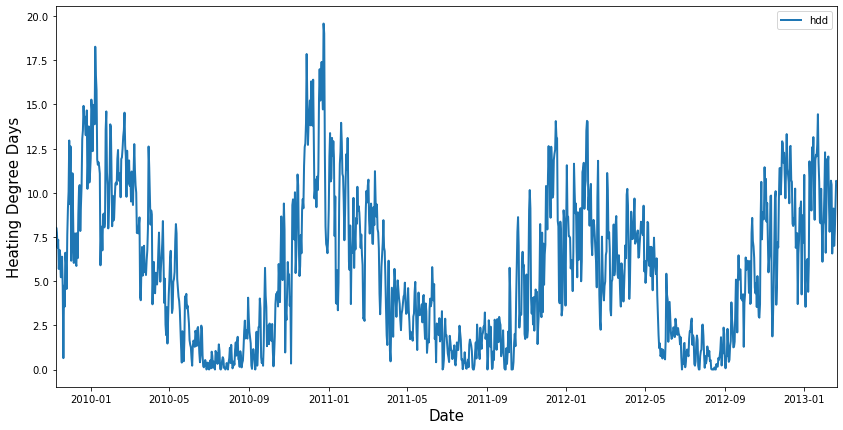

In [331]:
# Plot dailyhdd 
# line plot of daily heating degree days
df_dailyhdd.plot(x='date', y='hdd', figsize=(14,7), linewidth=2, fontsize=10)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Heating Degree Days', fontsize=15)
# daily heating degree days exhibit seasonality with peak during winter months and troughing in summer

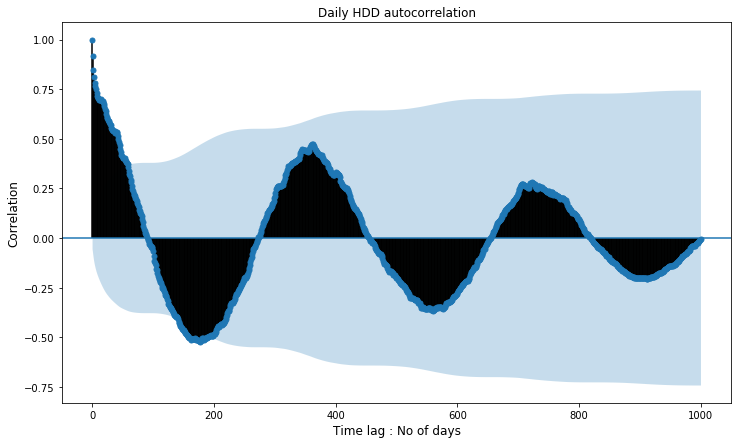

In [332]:
# confirm visual inference of seasonality with formal ACF test 
# ACF describes the autocorrelation between a HDD value and another HDD observation at a prior timestep. The shaded region shows the 95% confidence interval. The postive correlation 
# peaks at 12 months and trails off at subsequent lags of 24m and 36m as the effect was weakened. 
from matplotlib.pylab import rcParams # this is to set figue size in acf plot

# matplotlib.rcdefaults() # reset style sheet
# plt.style.use('ggplot') # R style ggplots
rcParams['figure.figsize'] = 12, 7 # set figure size
sm.graphics.tsa.plot_acf(df_dailyhdd['hdd'], lags=1000)
plt.xlabel('Time lag : No of days',fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('Daily HDD autocorrelation')
plt.show()

**Analysis : How Heating Degree Days vary by month and time of  the day**

In [333]:
# seasonality : by month
df_dailyhdd.dtypes

date     object
hdd     float64
dtype: object

In [334]:
# convert date column to datetime (index)
df_dailyhdd["date"]= pd.to_datetime(df_dailyhdd["date"])
df_dailyhdd.dtypes

date    datetime64[ns]
hdd            float64
dtype: object

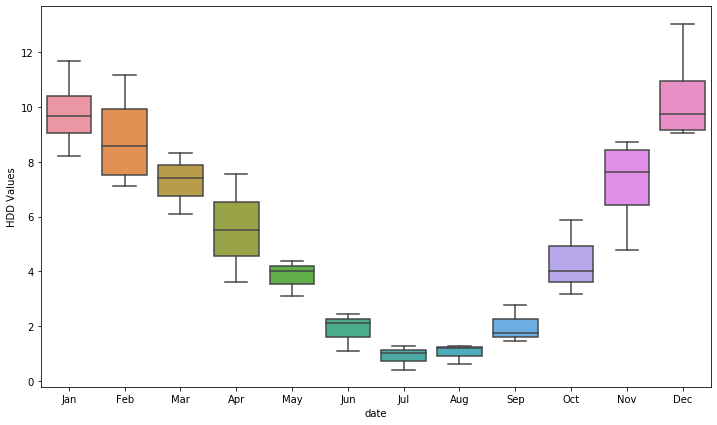

In [335]:
# 12 seasonality in hdd
plt.figure(figsize=(12, 7))
fig = sns.boxplot(x=df_monthlyhdd.index.month, y='hdd',data=df_monthlyhdd)
fig.set(ylabel='HDD Values')
fig.set_xticklabels(['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov','Dec'])
plt.show()

In [336]:
df_hourlyhdd.dtypes
df_hourlyhdd.columns

Index(['date_time', 'hdd'], dtype='object')

In [337]:
# set date_time to be the index in hourlyhdd dataframe
df_hourlyhdd["date_time"] = pd.to_datetime(df_hourlyhdd["date_time"],format="%d-%b-%Y")
df_hourlyhdd.set_index("date_time", inplace = True)

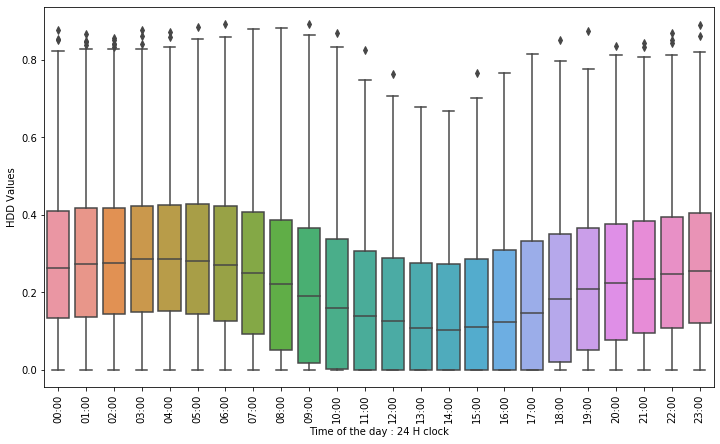

In [338]:
# 1 day seasonality in hdd
fig = sns.boxplot(x=df_hourlyhdd.index.hour, y='hdd',data=df_hourlyhdd)
fig.set(xlabel='Time of the day : 24 H clock', ylabel='HDD Values')
fig.set_xticklabels(['00:00','01:00','02:00','03:00', '04:00', '05:00', '06:00', '07:00','08:00','09:00','10:00','11:00',
                    '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00','19:00','20:00', '21:00','22:00','23:00'], rotation=90)
plt.show()
# Conclusion: Heating demand gradually falls during office hours( 09:00 and 16:00) before rising up as people return to the homes. 

## Forecasting Heating Degree Days

In [ ]:
# Instead using SQL join, we will use Pandas to perform an inner join of weather and hourlyHDD dataframes

In [339]:
# query the weather table
sql = "SELECT time,temperature FROM weather"

try:
    dbConnection = get_DBConnection()
    df_weather = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [340]:
df_weather.head()

,time,temperature
0,2011-01-02 00:00:00,3.59
1,2011-01-02 01:00:00,3.56
2,2011-01-02 02:00:00,3.64
3,2011-01-02 03:00:00,2.85
4,2011-01-02 04:00:00,2.85


In [341]:
# examine how many rows that the dataframe has
df_weather.shape
# data starts in 2011

(5878, 2)

In [342]:
#examine last row 
df_weather.iloc[-1]
# last observation is in 2020. this dataset has some hourly data from 2011 and remaining in 2020

time           2020-04-03 23:00:00
temperature                   7.94
Name: 5877, dtype: object

In [343]:
# set time to be the index in weather dataframe
df_weather["time"] = pd.to_datetime(df_weather["time"],format="%d-%b-%Y")
df_weather.set_index("time", inplace = True)

In [344]:
# perform an inner join with hourlyHDD tables using pandas
df_inner = df_weather.join(df_hourlyhdd, how ='inner')
df_inner.head()

,temperature,hdd
2011-01-02 00:00:00,3.59,0.467741
2011-01-02 01:00:00,3.56,0.471159
2011-01-02 02:00:00,3.64,0.479711
2011-01-02 03:00:00,2.85,0.483592
2011-01-02 04:00:00,2.85,0.485431


In [345]:
# size of the datset 
df_inner.shape

(3623, 2)

In [346]:
df_weather.iloc[-1]
# df_weather has roughly 4 months of hourly data

temperature    7.94
Name: 2020-04-03 23:00:00, dtype: float64

In [347]:
# save hourlyDD and weather dataframe as csv files
df_inner.to_csv('combined.csv')

In [348]:
df_dailyhdd.to_csv('dailyhdd.csv')

<font color=blue><b><i>The remaining steps in time series forcasting is done in R. Please see the R script in the zip file</b></i></font>